In [ ]:
!pip install tensorflow-text

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/NLP/spam_ham_dataset.csv")
df.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df = df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.head(5)

,label,text,label_num
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
df.groupby('label').describe()

label_num                                   
          count mean  std  min  25%  50%  75%  max
label                                             
ham      3672.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam     1499.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

In [ ]:
df_spam = df[df['label']=='spam']
df_ham = df[df['label']=='ham']
df_ham_downsample = df_ham.sample(df_spam.shape[0])

In [ ]:
df_ham_downsample.shape


(1499, 3)

In [ ]:
df_balenced =pd.concat([df_ham_downsample,df_spam])
df_balenced.shape

(2998, 3)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(df_balenced['text'],df_balenced['label_num'], stratify=df_balenced['label_num'])

In [ ]:
X_train.head(6)

1310    Subject: = ? iso - 8859 - 7 ? q ? = 5 b = 3 f ...
265     Subject: enron / hpl actuals for september 21 ...
749     Subject: re : noms / actual flow for 3 / 19 / ...
4413    Subject: revisions - march wellhead estimate\r...
1029    Subject: cleburne outage\r\ngentlemen ,\r\ni w...
504     Subject: 30 seconds refinance\r\nhello ,\r\nwe...
Name: text, dtype: object

In [ ]:
bert_preprocess = hub.KerasLayer("https://kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-preprocess/versions/3")

In [ ]:
bert_encoder = hub.KerasLayer("https://www.kaggle.com/models/tensorflow/bert/frameworks/TensorFlow2/variations/en-uncased-l-12-h-768-a-12/versions/4")

In [ ]:
def get_sentence_embedding(sentences):
  preprocess_text = bert_preprocess(sentences)
  return bert_encoder(preprocess_text)

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name = 'text')
preprocess_text= bert_preprocess(text_input)
outputs= bert_encoder(preprocess_text)
l = tf. keras.layers.Dropout(0.1,name="Dropout")(outputs['pooled_output'])
l= tf. keras.layers.Dense(1, activation ='sigmoid', name = 'pooled_output')(l)
model = tf.keras.Model(inputs=[text_input], outputs=[l])


In [ ]:
Metrics =[
    tf.keras.metrics.BinaryAccuracy(name='accurary'),
    tf.keras.metrics.Precision(name='Precision'),
    tf.keras.metrics.Recall(name='Recall')
]

In [ ]:
model.compile(optimizer='adam',
              loss= 'binary_crossentropy',
              metrics = Metrics
              )

In [ ]:
model.fit(X_train, y_train, epochs =30)

Epoch 1/30
71/71 [==============================] - 36s 328ms/step - loss: 0.6601 - accurary: 0.5952 - Precision: 0.6004 - Recall: 0.5694
Epoch 2/30
71/71 [==============================] - 24s 331ms/step - loss: 0.5662 - accurary: 0.7060 - Precision: 0.7178 - Recall: 0.6788
Epoch 3/30
71/71 [==============================] - 23s 324ms/step - loss: 0.5225 - accurary: 0.7500 - Precision: 0.7518 - Recall: 0.7464
Epoch 4/30
71/71 [==============================] - 24s 335ms/step - loss: 0.4857 - accurary: 0.7838 - Precision: 0.7943 - Recall: 0.7660
Epoch 5/30
71/71 [==============================] - 24s 336ms/step - loss: 0.4590 - accurary: 0.8056 - Precision: 0.8126 - Recall: 0.7945
Epoch 6/30
71/71 [==============================] - 24s 331ms/step - loss: 0.4291 - accurary: 0.8301 - Precision: 0.8416 - Recall: 0.8132
Epoch 7/30
71/71 [==============================] - 24s 341ms/step - loss: 0.4102 - accurary: 0.8439 - Precision: 0.8556 - Recall: 0.8274
Epoch 8/30
71/71 [================

In [ ]:
model.evaluate(X_test, y_test)

24/24 [==============================] - 9s 322ms/step - loss: 0.2191 - accurary: 0.9467 - Precision: 0.9328 - Recall: 0.9627


[0.21906115114688873,
 0.9466666579246521,
 0.9328165650367737,
 0.9626666903495789]

In [ ]:
Email_test=["Subject: photoshop , windows , office . cheap . main trending abasements darer prudently fortuitous undergone lighthearted charm orinoco taster railroad affluent pornographic cuvier irvin parkhouse blameworthy chlorophyll robed diagrammatic fogarty clears bayda inconveniencing managing represented smartness hashish academies shareholders unload badness danielson pure caffein spaniard chargeable levin"]

In [ ]:
model.predict(Email_test)

1/1 [==============================] - 1s 753ms/step


array([[0.9967956]], dtype=float32)

In [ ]:
model.save("/content/drive/MyDrive/NLP/bert")

In [ ]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

24/24 [==============================] - 9s 335ms/step


In [ ]:
import numpy as np
y_predicted = np.where(y_predicted>0.5,1,0)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm =confusion_matrix(y_test,y_predicted)

Text(50.722222222222214, 0.5, 'Truth')

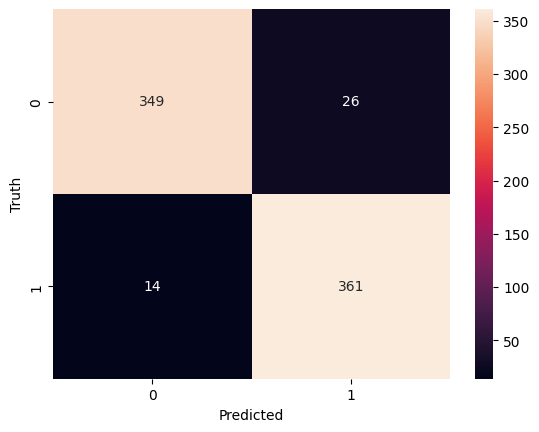

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot = True, fmt ='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")